In [56]:
from re import U
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

# Define parameters
Lx = 100.0       # Length of the domain in the x direction (m)
Lz = 100.0       # Length of the domain in the z direction (m)
Nx = 100        # Number of grid points in x direction
Nz = 100        # Number of grid points in z direction
dx = Lx / Nx    # Grid spacing in x direction
dz = Lz / Nz    # Grid spacing in z direction
dt = 0.1        # Time step (s)
Tmax = 2        # Maximum time (s)
rho = 750.0     # Density (kg/m^3)
mu = 300        # Shear modulus (Pa) S-waves
lam = 1500.0       # Lame's first parameter (Pa) P-waves
source_strength = 10.0  # Gaussian source strength

# Derived parameters
T = (mu * dt**2) / rho  # Temporal factor
A = lam + 2 * mu        # Coefficient A
B = lam + mu            # Coefficient B

# Create the grid
x = np.linspace(0, Lx, Nx)
z = np.linspace(0, Lz, Nz)

# Initializing the fields u, v, and w
u = np.zeros((Nx, Nz))  # Displacement in x direction
v = np.zeros((Nx, Nz))  # Displacement in y direction
w = np.zeros((Nx, Nz))  # Displacement in z direction

# Initial velocity is zero
u_dot = np.zeros((Nx, Nz))
v_dot = np.zeros((Nx, Nz))
w_dot = np.zeros((Nx, Nz))

# Source term - Gaussian source at the center
source_x = Nx // 2
source_z = Nz // 2
for i in range(Nx):
    for j in range(Nz):
        u[i, j] += source_strength * np.exp(-((i - source_x)**2 + (j - source_z)**2) / 100.0)

# Time-stepping loop
time_steps = int(Tmax / dt)

# Calculate indices for 5 equally spaced time steps
time_indices = np.linspace(0, time_steps - 1, 10, dtype=int)
print(time_indices)
# Plotting at specific time steps
for t in range(0, time_steps-1):
    # Compute u, v, w at the next time step using finite difference scheme
    u_new = np.copy(u)
    v_new = np.copy(v)
    w_new = np.copy(w)

    # Update u (x-direction displacement)
    for i in range(1, Nx-1):
        for j in range(1, Nz-1):
            u_new[i, j] = T * (A * (u[i+1, j] - 2 * u[i, j] + u[i-1, j]) / dx**2 +
                               B * (w[i+1, j+1] - w[i+1, j-1] - w[i-1, j+1] + w[i-1, j-1]) / (4 * dx * dz) +
                               mu * (u[i, j+1] - 2 * u[i, j] + u[i, j-1]) / dz**2) + 2 * u[i, j] - u[i, j]

    # Update v (y-direction displacement)
    for i in range(1, Nx-1):
        for j in range(1, Nz-1):
            v_new[i, j] = T * ((v[i+1, j] - 2 * v[i, j] + v[i-1, j]) / dx**2 +
                               (v[i, j+1] - 2 * v[i, j] + v[i, j-1]) / dz**2) + 2 * v[i, j] - v[i, j]

    # Update w (z-direction displacement)
    for i in range(1, Nx-1):
        for j in range(1, Nz-1):
            w_new[i, j] = T * (A * (w[i+1, j] - 2 * w[i, j] + w[i-1, j]) / dx**2 +
                               B * (u[i+1, j+1] - u[i+1, j-1] - u[i-1, j+1] + u[i-1, j-1]) / (4 * dx * dz) +
                               mu * (w[i, j+1] - 2 * w[i, j] + w[i, j-1]) / dz**2) + 2 * w[i, j] - w[i, j]

    # Update the displacement fields for the next iteration
    u = np.copy(u_new)
    v = np.copy(v_new)
    w = np.copy(w_new)

    # Plotting at specified time steps
    if t in time_indices:
        # Create the plot
        plt.figure(figsize=(8, 6))

        # Plot the contour map for displacement in the z-direction (w)
        contour = plt.contour(x, z, w.T, levels=20, cmap='viridis')  # Contour plot (no fill)
        plt.colorbar(contour, label="Displacement (w)")

        # Labeling axes and title
        plt.title(f"Displacement in Z Direction at t = {t * dt:.3f} s", fontsize=14)
        plt.xlabel("X (m)", fontsize=12)
        plt.ylabel("Z (m)", fontsize=12)

        # Add gridlines and enhance plot readability
        plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.7)

        # Show the plot
        plt.show()
    if t in time_indices:
        # Create the plot
        plt.figure(figsize=(8, 6))

        # Plot the contour map for displacement in the z-direction (w)
        contour = plt.contour(x, z, u.T, levels=20, cmap='viridis')  # Contour plot (no fill)
        plt.colorbar(contour, label="Displacement (w)")

        # Labeling axes and title
        plt.title(f"Displacement in x Direction at t = {t * dt:.3f} s", fontsize=14)
        plt.xlabel("X (m)", fontsize=12)
        plt.ylabel("Z (m)", fontsize=12)

        # Add gridlines and enhance plot readability
        plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.7)

        # Show the plot
        plt.show()

# Final plot (last time step)
plt.figure(figsize=(8, 6))
plt.contour(x, z, w.T, levels=100, cmap='viridis')
plt.colorbar(label="Displacement (w)")
plt.title("Displacement in Z Direction at Final Time Step")
plt.xlabel("X (m)")
plt.ylabel("Z (m)")
plt.show()
# Final plot (last time step)
plt.figure(figsize=(8, 6))
plt.contour(x, z, u.T, levels=100, cmap='viridis')
plt.colorbar(label="Displacement (w)")
plt.title("Displacement in X Direction at Final Time Step")
plt.xlabel("X (m)")
plt.ylabel("Z (m)")
plt.show()


Output hidden; open in https://colab.research.google.com to view.

[ 0  4  9 14 19]


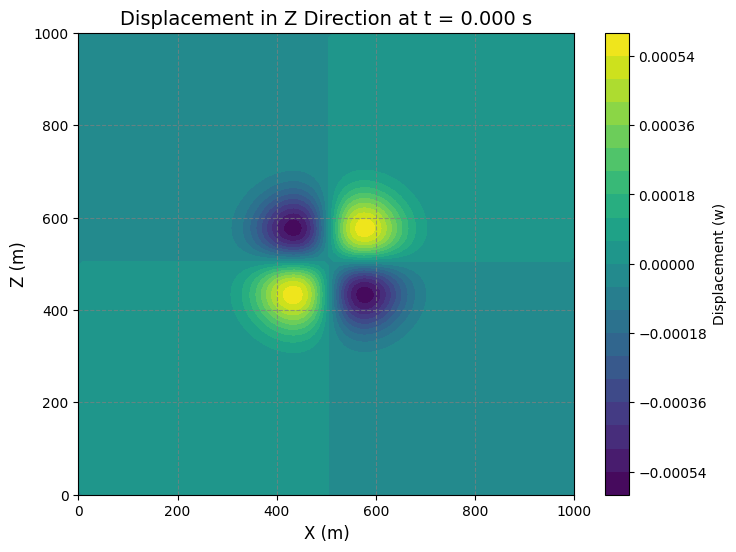

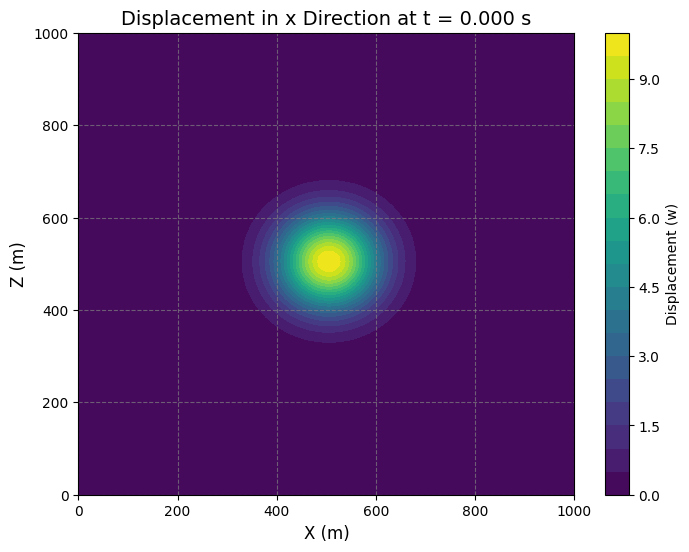

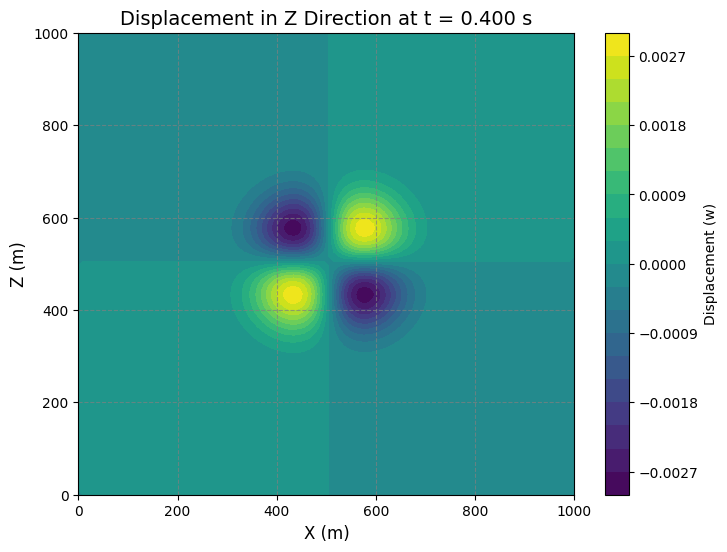

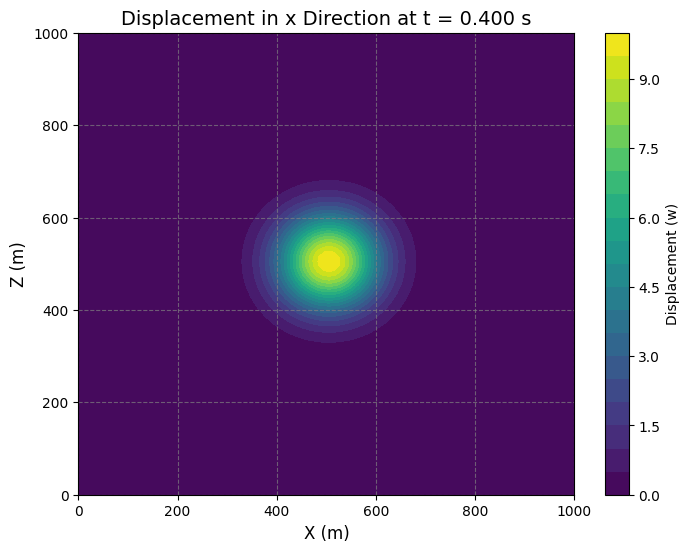

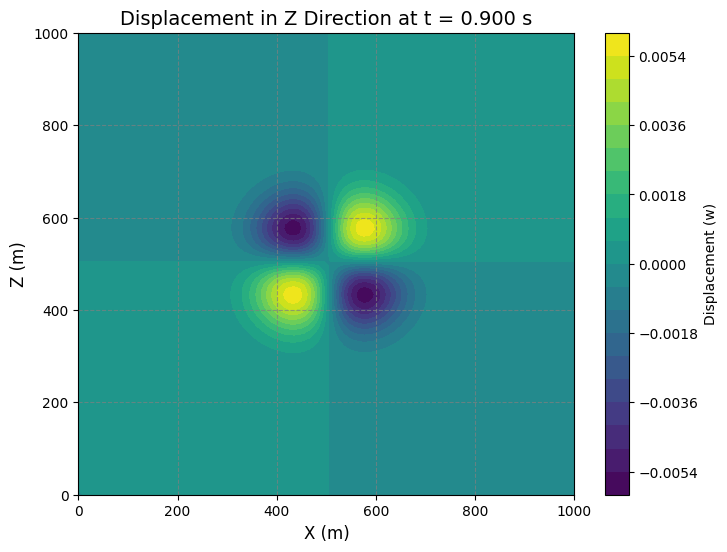

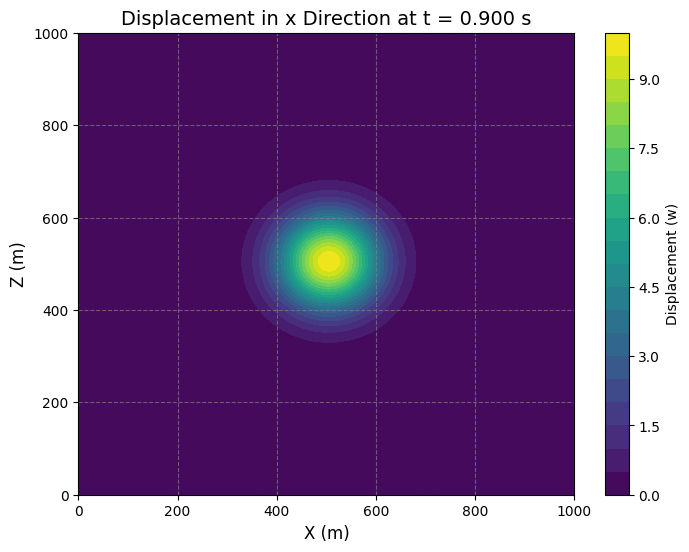

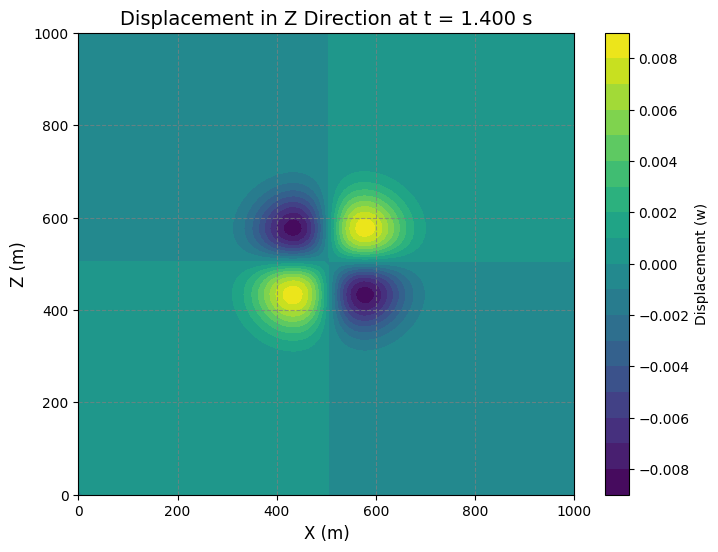

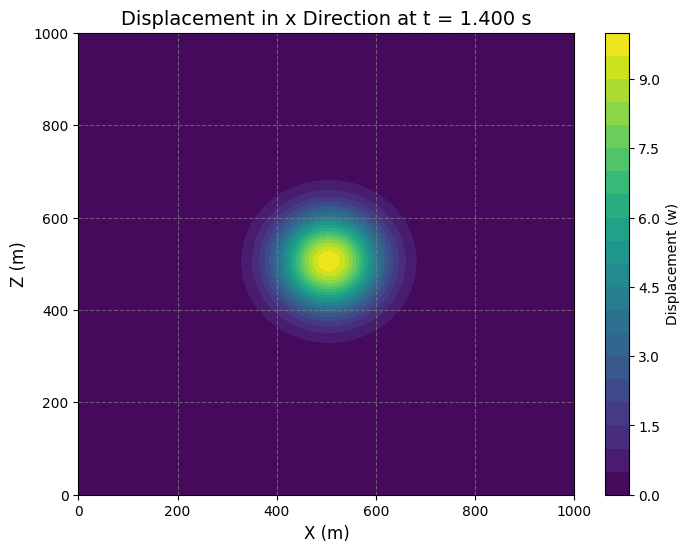

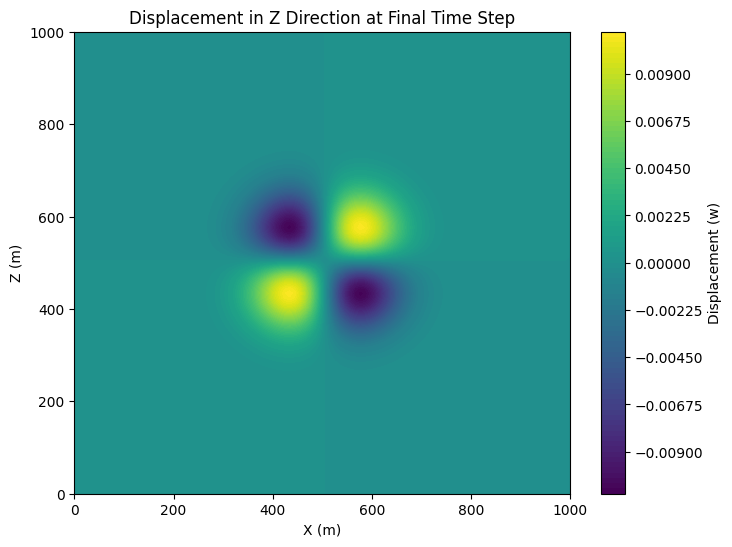

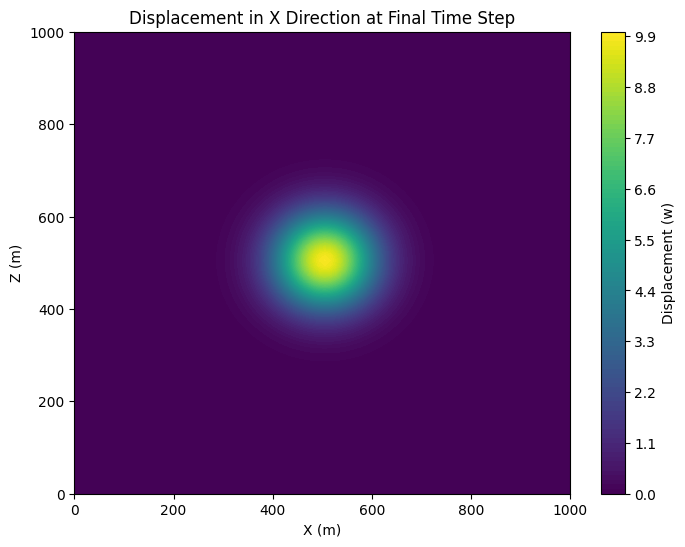

In [55]:
from re import U
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

# Define parameters
Lx = 1000.0       # Length of the domain in the x direction (m)
Lz = 1000.0       # Length of the domain in the z direction (m)
Nx = 100        # Number of grid points in x direction
Nz = 100        # Number of grid points in z direction
dx = Lx / Nx    # Grid spacing in x direction
dz = Lz / Nz    # Grid spacing in z direction
dt = 0.1        # Time step (s)
Tmax = 2        # Maximum time (s)
rho = 2000.0     # Density (kg/m^3)
mu = 400        # Shear modulus (Pa)
lam = 1.5       # Lame's first parameter (Pa)
source_strength = 10.0  # Gaussian source strength

# Derived parameters
T = (mu * dt**2) / rho  # Temporal factor
A = lam + 2 * mu        # Coefficient A
B = lam + mu            # Coefficient B

# Create the grid
x = np.linspace(0, Lx, Nx)
z = np.linspace(0, Lz, Nz)

# Initializing the fields u, v, and w
u = np.zeros((Nx, Nz))  # Displacement in x direction
v = np.zeros((Nx, Nz))  # Displacement in y direction
w = np.zeros((Nx, Nz))  # Displacement in z direction

# Initial velocity is zero
u_dot = np.zeros((Nx, Nz))
v_dot = np.zeros((Nx, Nz))
w_dot = np.zeros((Nx, Nz))

# Source term - Gaussian source at the center
source_x = Nx // 2
source_z = Nz // 2
for i in range(Nx):
    for j in range(Nz):
        u[i, j] += source_strength * np.exp(-((i - source_x)**2 + (j - source_z)**2) / 100.0)

# Time-stepping loop
time_steps = int(Tmax / dt)

# Calculate indices for 5 equally spaced time steps
time_indices = np.linspace(0, time_steps - 1, 5, dtype=int)
print(time_indices)
# Plotting at specific time steps
for t in range(0, time_steps-1):
    # Compute u, v, w at the next time step using finite difference scheme
    u_new = np.copy(u)
    w_new = np.copy(w)

    # Update u (x-direction displacement)
    for i in range(1, Nx-1):
        for j in range(1, Nz-1):
            u_new[i, j] = T * (A * (u[i+1, j] - 2 * u[i, j] + u[i-1, j]) / dx**2 +
                               B * (w[i+1, j+1] - w[i+1, j-1] - w[i-1, j+1] + w[i-1, j-1]) / (4 * dx * dz) +
                               mu * (u[i, j+1] - 2 * u[i, j] + u[i, j-1]) / dz**2) + 2 * u[i, j] - u[i, j]


    # Update w (z-direction displacement)
    for i in range(1, Nx-1):
        for j in range(1, Nz-1):
            w_new[i, j] = T * (A * (w[i+1, j] - 2 * w[i, j] + w[i-1, j]) / dx**2 +
                               B * (u[i+1, j+1] - u[i+1, j-1] - u[i-1, j+1] + u[i-1, j-1]) / (4 * dx * dz) +
                               mu * (w[i, j+1] - 2 * w[i, j] + w[i, j-1]) / dz**2) + 2 * w[i, j] - w[i, j]

    # Update the displacement fields for the next iteration
    u = np.copy(u_new)
    w = np.copy(w_new)

    # Plotting at specified time steps
    if t in time_indices:
        # Create the plot
        plt.figure(figsize=(8, 6))

        # Plot the contour map for displacement in the z-direction (w)
        contour = plt.contourf(x, z, w.T, levels=20, cmap='viridis')  # Contour plot (no fill)
        plt.colorbar(contour, label="Displacement (w)")

        # Labeling axes and title
        plt.title(f"Displacement in Z Direction at t = {t * dt:.3f} s", fontsize=14)
        plt.xlabel("X (m)", fontsize=12)
        plt.ylabel("Z (m)", fontsize=12)

        # Add gridlines and enhance plot readability
        plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.7)

        # Show the plot
        plt.show()
    if t in time_indices:
        # Create the plot
        plt.figure(figsize=(8, 6))

        # Plot the contour map for displacement in the z-direction (w)
        contour = plt.contourf(x, z, u.T, levels=20, cmap='viridis')  # Contour plot (no fill)
        plt.colorbar(contour, label="Displacement (w)")

        # Labeling axes and title
        plt.title(f"Displacement in x Direction at t = {t * dt:.3f} s", fontsize=14)
        plt.xlabel("X (m)", fontsize=12)
        plt.ylabel("Z (m)", fontsize=12)

        # Add gridlines and enhance plot readability
        plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.7)

        # Show the plot
        plt.show()

# Final plot (last time step)
plt.figure(figsize=(8, 6))
plt.contourf(x, z, w.T, levels=100, cmap='viridis')
plt.colorbar(label="Displacement (w)")
plt.title("Displacement in Z Direction at Final Time Step")
plt.xlabel("X (m)")
plt.ylabel("Z (m)")
plt.show()
# Final plot (last time step)
plt.figure(figsize=(8, 6))
plt.contourf(x, z, u.T, levels=100, cmap='viridis')
plt.colorbar(label="Displacement (w)")
plt.title("Displacement in X Direction at Final Time Step")
plt.xlabel("X (m)")
plt.ylabel("Z (m)")
plt.show()
